In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Load data
data = pd.read_excel('/content/Modified_Data_for_Analysis.xlsx')

# Define the dependent and independent variables for the OLS regression model
y = data['Likelihood_to_Choose']  # Continuous score from 0 to 100
X = data[['Rational_Review', 'Age_group_25to34', 'Age_group_35to54',
          'Annual_Income_$50,001to$75,000', 'Annual_Income_Above$100,000',
          'Annual_Income_$25,000to$50,000', 'Annual_Income_Below$25,000',
          'Annual_Income_$75,001to$100,000', 'Travel_Frequency_between1and2',
          'Travel_Frequency_between3and5', 'Travel_Frequency_between6and10',
          'Accommodation_Type_hotels', 'Accommodation_Type_Airbnb',
          'Accommodation_Type_hostels', 'Travel_Purpose_leisure',
          'Travel_Purpose_both', 'Travel_Purpose_business', 'Airbnb_Review_WTP']]

# Add a constant to the model
X = sm.add_constant(X)

# Run the OLS regression model
model = sm.OLS(y, X).fit()

# Display regression summary
model_summary = model.summary()
print(model_summary)



                             OLS Regression Results                             
Dep. Variable:     Likelihood_to_Choose   R-squared:                       0.124
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.9947
Date:                  Tue, 05 Nov 2024   Prob (F-statistic):              0.465
Time:                          23:21:49   Log-Likelihood:                -474.04
No. Observations:                   113   AIC:                             978.1
Df Residuals:                        98   BIC:                             1019.
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


model = LinearRegression()
rfe = RFE(model, n_features_to_select=15)
X_rfe = X.drop(columns=['const'])  # Drop constant to use in RFE

rfe.fit(X_rfe, y)
selected_features = X_rfe.columns[rfe.support_]

print("Selected features:", selected_features)

Selected features: Index(['Rational_Review', 'Age_group_35to54', 'Annual_Income_$50,001to$75,000',
       'Annual_Income_Above$100,000', 'Annual_Income_$25,000to$50,000',
       'Annual_Income_Below$25,000', 'Annual_Income_$75,001to$100,000',
       'Travel_Frequency_between1and2', 'Travel_Frequency_between3and5',
       'Accommodation_Type_hotels', 'Accommodation_Type_Airbnb',
       'Accommodation_Type_hostels', 'Travel_Purpose_leisure',
       'Travel_Purpose_both', 'Travel_Purpose_business'],
      dtype='object')


In [ ]:

y = data['Likelihood_to_Choose']  # Continuous score from 0 to 100
X = data[['Rational_Review', 'Age_group_35to54', 'Annual_Income_$50,001to$75,000',
       'Annual_Income_Above$100,000', 'Annual_Income_$25,000to$50,000',
       'Annual_Income_Below$25,000', 'Annual_Income_$75,001to$100,000',
       'Travel_Frequency_between1and2', 'Travel_Frequency_between3and5',
       'Accommodation_Type_hotels', 'Accommodation_Type_Airbnb',
       'Accommodation_Type_hostels', 'Travel_Purpose_leisure',
       'Travel_Purpose_both', 'Travel_Purpose_business']]

# Add a constant to the model
X = sm.add_constant(X)

# Run the OLS regression model
model2 = sm.OLS(y, X).fit()

# Display regression summary
model_summary = model2.summary()
print(model_summary)

                             OLS Regression Results                             
Dep. Variable:     Likelihood_to_Choose   R-squared:                       0.124
Model:                              OLS   Adj. R-squared:                  0.019
Method:                   Least Squares   F-statistic:                     1.180
Date:                  Tue, 05 Nov 2024   Prob (F-statistic):              0.308
Time:                          23:23:04   Log-Likelihood:                -474.07
No. Observations:                   113   AIC:                             974.1
Df Residuals:                       100   BIC:                             1010.
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

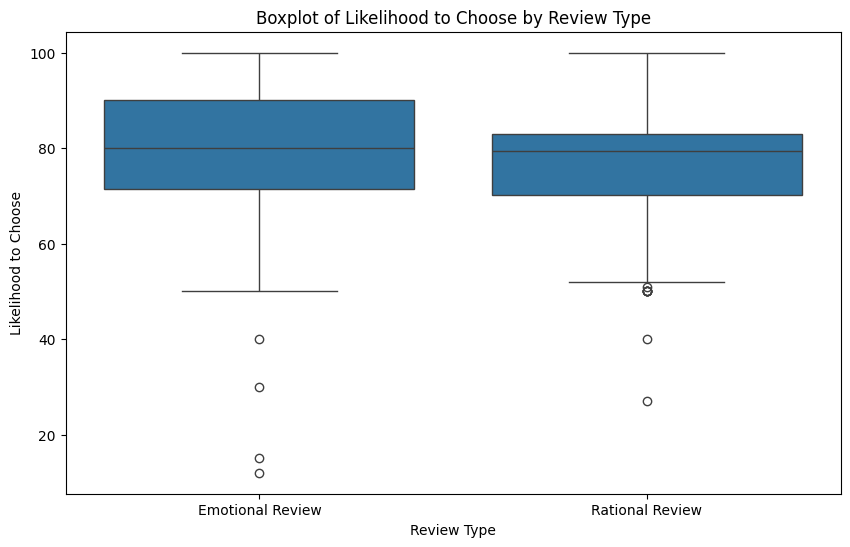

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
# Box plot of Likelihood to Choose for Rational vs Emotional Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rational_Review', y='Likelihood_to_Choose', data=data)
plt.xticks([0, 1], ['Emotional Review', 'Rational Review'])
plt.title("Boxplot of Likelihood to Choose by Review Type")
plt.xlabel("Review Type")
plt.ylabel("Likelihood to Choose")
plt.show()


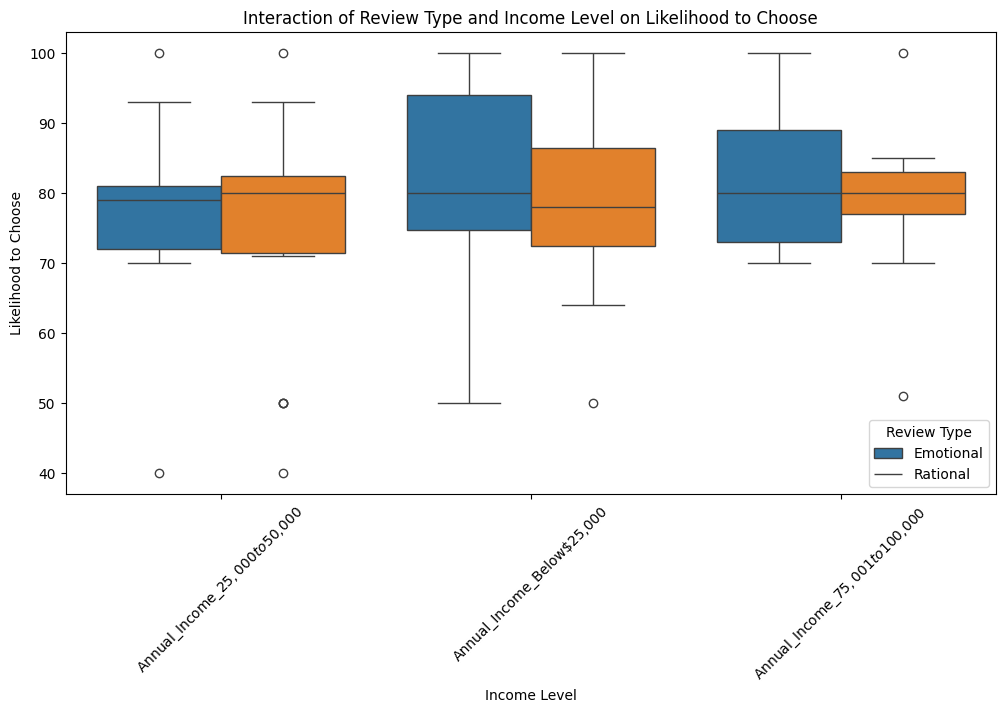

In [ ]:
from matplotlib import pyplot as plt
income_levels = ['Annual_Income_$25,000to$50,000', 'Annual_Income_Below$25,000',
                 'Annual_Income_$75,001to$100,000']

# Melting data for plotting interaction effects
data_interaction = data.melt(id_vars=['Rational_Review', 'Likelihood_to_Choose'],
                             value_vars=income_levels, var_name="Income_Level", value_name="Present")
data_interaction = data_interaction[data_interaction['Present'] == 1]  # Filter to include only present categories

plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Level', y='Likelihood_to_Choose', hue='Rational_Review', data=data_interaction)
plt.xticks(rotation=45)
plt.legend(title="Review Type", labels=["Emotional", "Rational"])
plt.title("Interaction of Review Type and Income Level on Likelihood to Choose")
plt.xlabel("Income Level")
plt.ylabel("Likelihood to Choose")
plt.show()


<ipython-input-7-e467174b8956>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=conf_int_wtb.index, data=conf_int_wtb.reset_index(), palette='Greens')


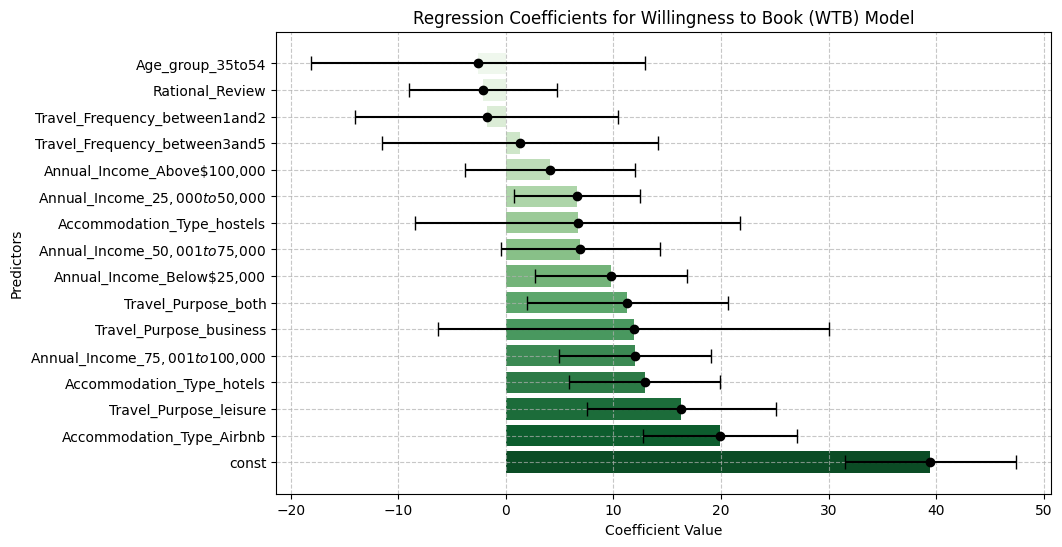

In [ ]:


# Extract coefficients and confidence intervals from the existing model
coefficients_wtb = model2.params
conf_int_wtb = model2.conf_int()
conf_int_wtb['Coefficient'] = coefficients_wtb

# Prepare data for plotting
conf_int_wtb.columns = ['Lower CI', 'Upper CI', 'Coefficient']
conf_int_wtb = conf_int_wtb.sort_values(by='Coefficient', ascending=True)

# Plotting WTB model coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y=conf_int_wtb.index, data=conf_int_wtb.reset_index(), palette='Greens')
plt.errorbar(conf_int_wtb['Coefficient'], conf_int_wtb.index, xerr=[conf_int_wtb['Coefficient'] - conf_int_wtb['Lower CI'],
                                                                    conf_int_wtb['Upper CI'] - conf_int_wtb['Coefficient']],
             fmt='o', color='black', capsize=5)
plt.title("Regression Coefficients for Willingness to Book (WTB) Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Predictors")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
